In [317]:
import pandas as pd, matplotlib.pyplot as plt, pylab as pl, seaborn as sbs
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from implementations import *
from proj1_helpers import *

# Use a subset 
yb, input_data, ids = load_csv_data("clean_train_data_.csv",True)
input_data.shape

df = pd.read_csv("clean_train_data_.csv")
col_labels = df.columns

In [318]:
N_FEATURES = input_data.shape[1]
N_DATA = len(input_data)
N_DATA

1363

In [319]:
y = yb
loss_vec = np.zeros(N_FEATURES)
loss_te_vec = np.zeros(N_FEATURES)
w_vec = np.zeros([N_FEATURES, 2])


for i in np.arange(N_FEATURES):
    x = input_data[:,i]
    
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)

    w_vec[i], loss_vec[i] = least_squares(y_tr, tx_tr)
    
    y_test = tx_te @ w_vec[i]
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_te_vec[i] = (y_te - y_test) @ (y_te - y_test) 

In [320]:
loss_te_vec

array([544., 396., 544., 460., 348., 392., 360., 576., 416., 556., 480.,
       404., 392., 504., 560., 544., 544., 564., 544., 464., 516., 548.,
       508., 496., 544., 584., 544., 544., 544., 552.])

In [321]:
I = np.argmin(loss_te_vec)
col_labels[I]

'DER_mass_vis'

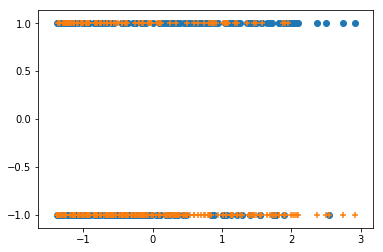

In [322]:
x = input_data[:,np.argmin(loss_te_vec)]

tx_tr = build_poly(x_tr, 1)
tx_te = build_poly(x_te, 1)
x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)

y_test = tx_te @ w_vec[np.argmin(loss_te_vec) ]
y_test[y_test >= 0] = 1
y_test[y_test < 0] = -1

plt.scatter(x_te,y_te)
plt.scatter(x_te,y_test, marker='+')

In [323]:
w_vec[np.argmin(loss_te_vec)]

array([-0.03920204,  0.30821897])

In [324]:
queue = np.delete(np.arange(N_FEATURES), I)
x0 = input_data[:,I]
lossls0=loss_te_vec[I]

w_vec = np.zeros([N_FEATURES, 3])
loss_tr_vec = np.zeros(N_FEATURES)
loss_t_vec = np.zeros(N_FEATURES)


for i in queue: 
    x = np.array([x0, input_data[:, i]]).T
    print('single feature loss', loss_te_vec[i])
    x_tr, y_tr, x_te, y_te = split_data(x ,y, 0.8)
    
    tx_tr = build_poly(x_tr, 1)
    tx_te = build_poly(x_te, 1)
    wls, lossls = least_squares(y_tr, tx_tr)
    w_vec[i] = wls
    loss_tr_vec[i] = lossls
    
    y_test = tx_te @ wls
    y_test[y_test >= 0] = 1
    y_test[y_test < 0] = -1
    loss_te = (y_te - y_test) @ (y_te - y_test)
    loss_t_vec[i] = loss_te
    print('combined feature loss',i, loss_te)
    lossls0 = loss_te
    


single feature loss 544.0
combined feature loss 0 348.0
single feature loss 396.0
combined feature loss 1 408.0
single feature loss 544.0
combined feature loss 2 352.0
single feature loss 460.0
combined feature loss 3 360.0
single feature loss 392.0
combined feature loss 5 380.0
single feature loss 360.0
combined feature loss 6 348.0
single feature loss 576.0
combined feature loss 7 380.0
single feature loss 416.0
combined feature loss 8 360.0
single feature loss 556.0
combined feature loss 9 364.0
single feature loss 480.0
combined feature loss 10 360.0
single feature loss 404.0
combined feature loss 11 372.0
single feature loss 392.0
combined feature loss 12 372.0
single feature loss 504.0
combined feature loss 13 384.0
single feature loss 560.0
combined feature loss 14 344.0
single feature loss 544.0
combined feature loss 15 348.0
single feature loss 544.0
combined feature loss 16 356.0
single feature loss 564.0
combined feature loss 17 360.0
single feature loss 544.0
combined featu

In [325]:
loss_t_vec.shape

(30,)

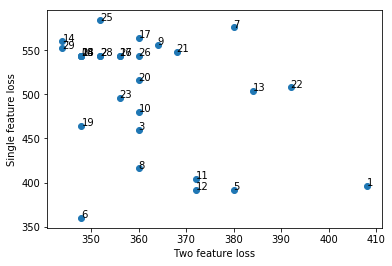

In [326]:
plt.scatter(np.delete(loss_t_vec,I),np.delete(loss_te_vec,I))
plt.xlabel('Two feature loss')
plt.ylabel('Single feature loss')
for i in np.arange(30):
    if i!=I:
        plt.annotate(i, (loss_t_vec[i], loss_te_vec[i]))
plt.savefig('Figures/2featureloss.png')



# Playing with polynomial degrees

In [327]:
features=np.array([2, 6, 9, 11, 12, 13, 14, 18, 23, 26])-1
features

array([ 1,  5,  8, 10, 11, 12, 13, 17, 22, 25])

In [328]:
data=df.iloc[:,features+2].values
x_tr, y_tr, x_te, y_te = split_data(data ,y, 0.8)
    
tx_tr = build_poly(x_tr, 2)
tx_te = build_poly(x_te, 2)
print(tx_te.shape)
wls, lossls = ridge_regression(y_tr, tx_tr, .8)
print(wls)
y_test = tx_te @ wls
y_test[y_test >= 0] = 1
y_test[y_test < 0] = -1
loss_te = (y_te - y_test) @ (y_te - y_test)
np.save('weights', wls)
loss_te

(67024, 21)
[-0.00303091  0.0012667   0.00237914 -0.01283386 -0.00644692 -0.01648946
  0.00627405  0.00710361  0.00871052 -0.01088669 -0.01239932 -0.00489731
 -0.01146651 -0.00249849 -0.01327878  0.00194507  0.00624168  0.00105915
 -0.00438408 -0.01232509  0.00755793]


ValueError: operands could not be broadcast together with shapes (273,) (67024,) 